#Trabalho de Data science - Lucas Salvador Santos Tavares - Matricula: 2121034

    A ideia desse codigo é você fazer o Risco Retorno de um portifolio de ações registradas na B3, é você conseguir analisar o quanto um ativo teve de retorno e quanto risco você correu para com a volatilidade presente nesse ativo.
    
    Primeiramente importamos as bibliotecas, pandas, numpy, seaborn, yfinance, matplotlib para montar todo o cogido. Posteriormente definimos o nosso "portifolio de ativos" como "ativos" fazendo uma lista com as ações que eu quero pro estudo
   
    Após isso eu defini a data que será feita o estudo. Após isso eu testo para ver se consigo puxar as informações do ativo no yfinance. Faço o download de todo o historico dos ativos. 
    
    Com isso primeiro testamos para ver se está funcionando a compilação da lista e o grafico feito pelo matplotib, primeiro vemos a volatilidade dos ativos através de seus desvios padrões e após isso vemos o quanto de retorno que eles trouxeram nos 9 anos colocados na data do estudo 
    
    Fizemos um grafico de dispersão com os retornos e volatilidades mas o problema é que não mostrava quem era quem. Com isso tive que integrar o nome de cada ativo com o seu respectivo local no grafico, aumentei o tamanho do grafico e VUALA.
    
    
    

In [35]:
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# obtendo os dados das ações

In [4]:
ativos = ['ABEV3.SA', 'MYPK3.SA', 'RADL3.SA', 'EGIE3.SA', 'TAEE11.SA', 'PETR4.SA', 'VALE3.SA', 'SUZB3.SA', 'WEGE3.SA', 'TAEE3.SA', 'BBDC3.SA', 'CYRE3.SA', 'ETER3.SA', 'FLRY3.SA', 'SIMH3.SA']


In [5]:
inicio = '2014-08-01'
fim = '2022-09-01'

In [6]:
yf.download('ETER3.SA', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2014-08-01    17.921663
2014-08-04    17.775789
2014-08-05    18.025860
2014-08-06    17.879988
2014-08-07    17.838305
                ...    
2022-08-25    12.697493
2022-08-26    12.573939
2022-08-29    12.745013
2022-08-30    12.554933
2022-08-31    12.212785
Name: Adj Close, Length: 2011, dtype: float64

In [7]:
df = pd.DataFrame()

In [8]:
for ativo in ativos:
  df[ativo] = yf.download(ativo, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df.head();

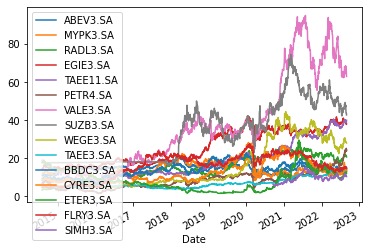

In [10]:
df.plot();

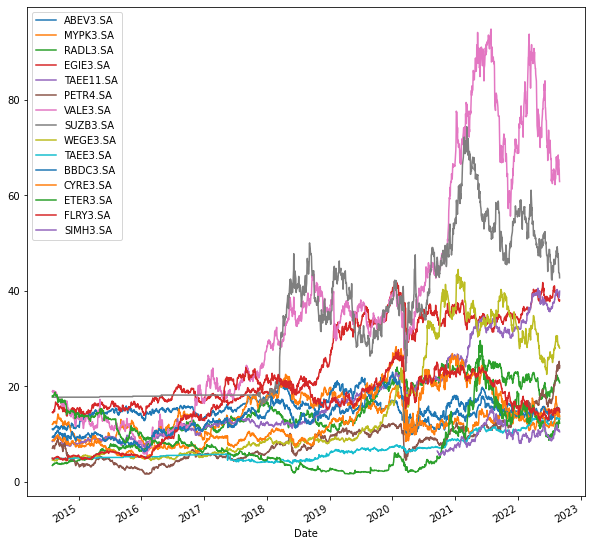

In [11]:
df.plot(figsize = (10, 10));

In [12]:
figsize = (10, 10)

In [13]:
normalizado = df/df.iloc[0]


In [14]:
normalizado.head()

,ABEV3.SA,MYPK3.SA,RADL3.SA,EGIE3.SA,TAEE11.SA,PETR4.SA,VALE3.SA,SUZB3.SA,WEGE3.SA,TAEE3.SA,BBDC3.SA,CYRE3.SA,ETER3.SA,FLRY3.SA,SIMH3.SA
Date,,,,,,,,,,,,,,,
2014-08-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,NaN
2014-08-04,1.001281,1.011508,1.041885,1.008577,1.019608,1.028947,1.011646,1.0,0.997066,1.0,1.021212,1.009516,0.991860,1.000667,NaN
2014-08-05,0.982063,1.014537,1.071204,0.991718,1.024510,1.036842,0.995279,1.0,1.012101,1.0,1.008747,1.019032,1.005814,0.986658,NaN
2014-08-06,0.990391,1.011508,1.045026,1.004732,1.016666,1.068947,1.000944,1.0,1.015769,1.0,1.011013,1.014274,0.997674,0.955971,NaN
2014-08-07,0.996156,1.029679,1.054974,1.010056,1.032353,1.060526,0.994649,1.0,1.001833,1.0,0.998549,0.999207,0.995349,0.965310,NaN


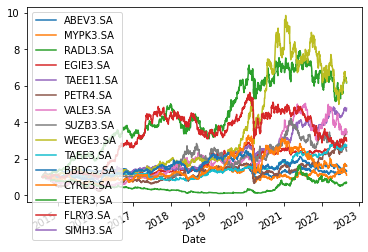

In [15]:
normalizado.plot();

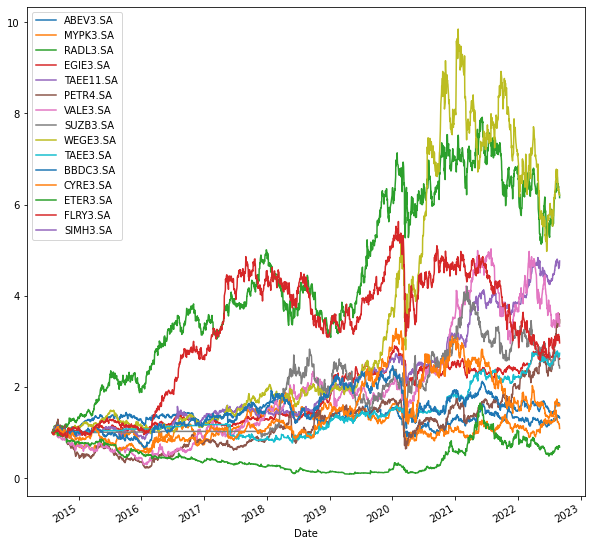

In [16]:
normalizado.plot(figsize = (10, 10));

In [17]:
retornos_diarios = df.pct_change()

In [18]:
retornos_diarios.head()

,ABEV3.SA,MYPK3.SA,RADL3.SA,EGIE3.SA,TAEE11.SA,PETR4.SA,VALE3.SA,SUZB3.SA,WEGE3.SA,TAEE3.SA,BBDC3.SA,CYRE3.SA,ETER3.SA,FLRY3.SA,SIMH3.SA
Date,,,,,,,,,,,,,,,
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-04,0.001281,0.011508,0.041885,0.008577,0.019608,0.028947,0.011646,0.0,-0.002934,0.0,0.021212,0.009516,-0.008140,0.000667,NaN
2014-08-05,-0.019194,0.002994,0.028140,-0.016716,0.004808,0.007673,-0.016179,0.0,0.015079,0.0,-0.012206,0.009426,0.014068,-0.014000,NaN
2014-08-06,0.008480,-0.002985,-0.024438,0.013123,-0.007656,0.030964,0.005692,0.0,0.003624,0.0,0.002247,-0.004669,-0.008092,-0.031102,NaN
2014-08-07,0.005822,0.017964,0.009519,0.005299,0.015430,-0.007878,-0.006289,0.0,-0.013719,0.0,-0.012329,-0.014855,-0.002331,0.009770,NaN


In [19]:
retornos_diarios.dropna()

,ABEV3.SA,MYPK3.SA,RADL3.SA,EGIE3.SA,TAEE11.SA,PETR4.SA,VALE3.SA,SUZB3.SA,WEGE3.SA,TAEE3.SA,BBDC3.SA,CYRE3.SA,ETER3.SA,FLRY3.SA,SIMH3.SA
Date,,,,,,,,,,,,,,,
2020-09-21,-0.004691,-0.052297,-0.010133,0.003800,0.001768,-0.034642,-0.026922,-0.030370,0.022746,0.006363,-0.017581,-0.009123,-0.083970,-0.003070,-0.033333
2020-09-22,0.005499,0.016406,0.010936,-0.000946,0.000000,-0.004785,0.003777,-0.023903,0.019243,-0.004215,0.010304,0.031565,0.025000,-0.009579,-0.000704
2020-09-23,-0.028125,-0.011739,-0.012116,-0.019654,-0.004236,-0.027404,0.022314,-0.015622,-0.032807,0.004233,-0.026302,-0.027624,-0.045529,-0.036615,0.005282
2020-09-24,0.018489,0.043801,0.024967,0.007730,0.010280,0.008403,-0.007445,-0.013511,0.031840,-0.004215,0.015987,0.023601,0.061329,-0.001434,-0.015762
2020-09-25,0.013418,-0.032006,-0.013680,-0.001678,-0.007018,-0.013235,0.010058,0.046522,-0.003722,-0.004233,-0.002170,0.007686,-0.011236,-0.019031,-0.007118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.001266,-0.006562,0.003104,-0.016707,-0.013441,-0.010702,0.019426,-0.012315,0.005558,-0.015385,0.006849,-0.005479,0.034056,0.015152,0.003633
2022-08-26,-0.009482,-0.017834,-0.019010,-0.002709,-0.003220,0.010817,-0.015014,-0.041631,-0.004836,-0.002976,-0.004947,-0.018595,-0.009731,-0.021493,-0.019910
2022-08-29,-0.003829,-0.001345,-0.003155,-0.003704,0.011928,0.024970,-0.019346,-0.001323,-0.015272,0.017164,0.003107,0.021053,0.013605,0.004881,0.022161


In [20]:
retornos_diarios = retornos_diarios.dropna()

In [21]:
# dataframe risco retorno

In [22]:
retornos_diarios.std()

ABEV3.SA     0.018826
MYPK3.SA     0.026930
RADL3.SA     0.020004
EGIE3.SA     0.012381
TAEE11.SA    0.012480
PETR4.SA     0.026117
VALE3.SA     0.022431
SUZB3.SA     0.021418
WEGE3.SA     0.022984
TAEE3.SA     0.012677
BBDC3.SA     0.018870
CYRE3.SA     0.028778
ETER3.SA     0.048627
FLRY3.SA     0.021639
SIMH3.SA     0.029503
dtype: float64

In [23]:
volatilidade = pd.DataFrame(retornos_diarios.std(), columns=['Vol'])

In [24]:
retornos_medios = pd.DataFrame(retornos_diarios.mean(), columns=['Retornos'])

In [25]:
volatilidade

,Vol
ABEV3.SA,0.018826
MYPK3.SA,0.026930
RADL3.SA,0.020004
EGIE3.SA,0.012381
TAEE11.SA,0.012480
PETR4.SA,0.026117
VALE3.SA,0.022431
SUZB3.SA,0.021418
WEGE3.SA,0.022984
TAEE3.SA,0.012677


In [26]:
retornos_medios

,Retornos
ABEV3.SA,0.000686
MYPK3.SA,0.000514
RADL3.SA,0.000110
EGIE3.SA,0.000287
TAEE11.SA,0.001374
PETR4.SA,0.002500
VALE3.SA,0.000948
SUZB3.SA,0.000029
WEGE3.SA,0.000130
TAEE3.SA,0.001359


In [27]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [28]:
risco_retorno

,Retornos,Vol
ABEV3.SA,0.000686,0.018826
MYPK3.SA,0.000514,0.026930
RADL3.SA,0.000110,0.020004
EGIE3.SA,0.000287,0.012381
TAEE11.SA,0.001374,0.012480
PETR4.SA,0.002500,0.026117
VALE3.SA,0.000948,0.022431
SUZB3.SA,0.000029,0.021418
WEGE3.SA,0.000130,0.022984
TAEE3.SA,0.001359,0.012677


In [29]:
# plotando Gráfico risco retorno 

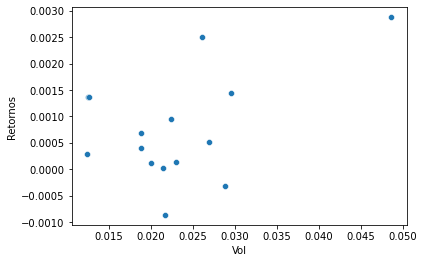

In [30]:
sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Retornos');

In [31]:
risco_retorno.shape[0]

15

In [32]:
range(risco_retorno.shape[0])

range(0, 15)

In [33]:
risco_retorno.index

Index(['ABEV3.SA', 'MYPK3.SA', 'RADL3.SA', 'EGIE3.SA', 'TAEE11.SA', 'PETR4.SA',
       'VALE3.SA', 'SUZB3.SA', 'WEGE3.SA', 'TAEE3.SA', 'BBDC3.SA', 'CYRE3.SA',
       'ETER3.SA', 'FLRY3.SA', 'SIMH3.SA'],
      dtype='object')

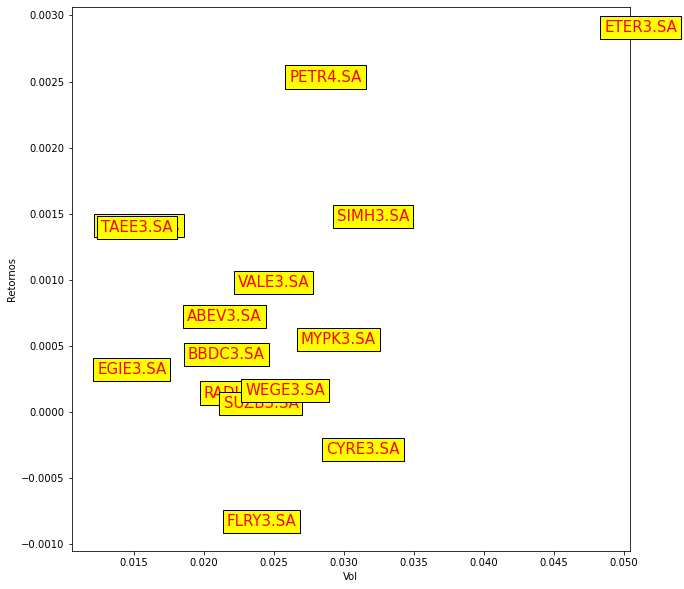

In [34]:

plt.subplots(figsize = (10, 10))

sns.scatterplot(data=risco_retorno, x = 'Vol', y='Retornos')


for i in range(risco_retorno.shape[0]):
    plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Retornos[i], s = risco_retorno.index[i],
            fontdict = dict(color = 'red', size = 15),
            bbox = dict(facecolor = 'yellow'))